In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

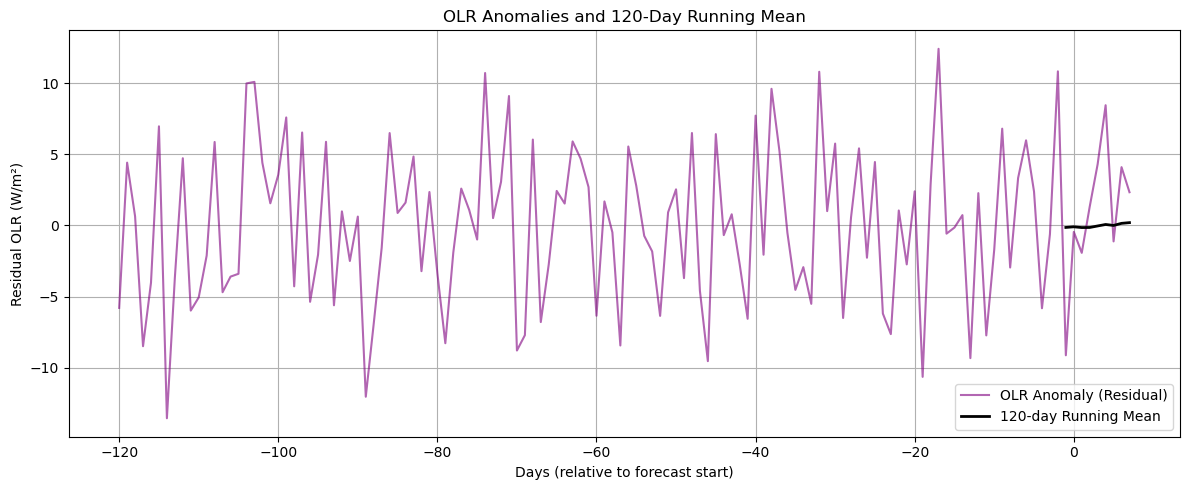

In [3]:
# Simulate OLR time series (128 days: 121 analysis + 7 forecast)
np.random.seed(123)
total_points = 128
olr_series = 240 + np.random.randn(total_points) * 5
time_days = np.arange(-121 + 1, 7 + 1)  # Days -120 to +7

# Step 1: Detrend the mean
olr_detrended = olr_series - np.mean(olr_series)

# Step 2: Keep only 3 harmonics using FFT
num_harmonics = 3
olr_fft = fft(olr_detrended)
harmonics_fft = np.zeros_like(olr_fft, dtype=complex)
harmonics_fft[:num_harmonics + 1] = olr_fft[:num_harmonics + 1]
harmonics_fft[-num_harmonics:] = olr_fft[-num_harmonics:]
olr_harmonics = np.real(ifft(harmonics_fft))

# Step 3: Compute anomalies (residuals after removing harmonics)
olr_anomaly = olr_detrended - olr_harmonics

# Step 4: Compute 120-day running mean of anomalies
window = 120
running_mean = np.convolve(olr_anomaly, np.ones(window) / window, mode='valid')
mean_time = time_days[window - 1:]  # Align with the running mean

# Step 5: Plot results
plt.figure(figsize=(12, 5))
plt.plot(time_days, olr_anomaly, label="OLR Anomaly (Residual)", color="purple", alpha=0.6)
plt.plot(mean_time, running_mean, label="120-day Running Mean", color="black", linewidth=2)
plt.title("OLR Anomalies and 120-Day Running Mean")
plt.xlabel("Days (relative to forecast start)")
plt.ylabel("Residual OLR (W/m²)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('120_days.png')
plt.show()